In [110]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy
import scipy.io as sio
import time

In [111]:
training = sio.loadmat(r'C:\Users\mubar\Machine Learning\Logistic Regression\ex3data1.mat')

In [112]:
X = training['X']
y = training['y']

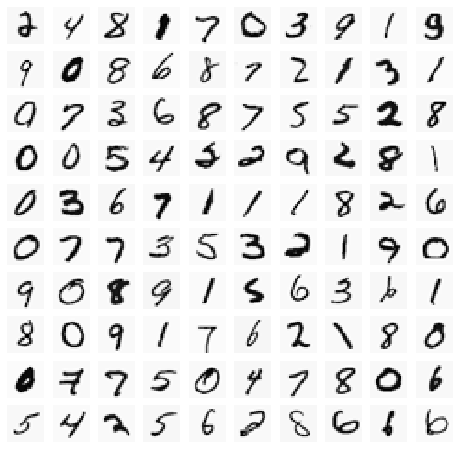

In [113]:
import matplotlib.image as mpimg
fig, axis = plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,5001),:].reshape(20,20,order="F"), cmap="Greys") #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

In [114]:
def change_array(array):
    
    new = np.zeros((5000,10))
   
    for j in range(0,10):
        
        for i in range(len(array)):
           
            if array[i][0] == j:
                
                new[i][j] = 1
                
            
            else:
                
                new[i][j] = 0
            
    return np.asarray(new)

In [115]:
y[0:500] = y[0:500] * 0
y_new = change_array(y)
dataframe = pd.DataFrame.from_records(y_new)

In [116]:
dataframe

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
y = np.asarray(dataframe)

In [118]:
def sigmoid(X, thetas):
    
    product = np.matmul(X,thetas)

    return 1/(1+np.exp(-1*product)) 

In [119]:
def sigmoid_gradient(z):
    
    return np.multiply(z,1-z)

In [120]:
def forward_propogation(X,thetas1, thetas2):

    X = np.hstack((np.ones((X.shape[0],1)),X))
    
    layer1_activations = sigmoid(X,thetas1)
    
    layer1_activations = np.hstack((np.ones((layer1_activations.shape[0],1)),layer1_activations))
    
    layer2_activations = sigmoid(layer1_activations,thetas2)
    
    return layer2_activations,  layer1_activations

In [121]:
def Random_Initialization(thetas_length1,thetas_length2, epsilon = 0.12):
    
    thetas1 =np.random.uniform(low= -1*epsilon, high=epsilon, size = (thetas_length1, 25))
    
    thetas2 =np.random.uniform(low= -1*epsilon, high=epsilon, size = (thetas_length2, 10))
    
    return thetas1, thetas2

In [122]:
def add_ones(matrix):
    
    ones = np.ones((matrix.shape[0],1))
    
    return np.hstack((ones, matrix))

In [77]:
elements = 5000
iterations = 10000

main_matrix = X

thetas_length1 = X.shape[1]

hidden_layer_length = 25

thetas1,thetas2 = Random_Initialization(thetas_length1+1, hidden_layer_length+1)

for i in range(iterations):
    
    DELTA2 = np.zeros((10,26))
    
    DELTA1 = np.zeros((25,401))
    
    X = main_matrix
        
    layer2_activations, layer1_activations = forward_propogation(X,thetas1, thetas2)
        
    delta3 = layer2_activations - y
        
        
    toreshape = sigmoid_gradient(layer1_activations)
    delta2 = np.matmul(delta3,thetas2.T) * toreshape
        
    delta2 = np.delete(delta2, (0), axis=1)
        
    X = add_ones(main_matrix)
        
        
    DELTA2 = DELTA2 + np.matmul(delta3.T,layer1_activations)
    DELTA1 = DELTA1 + np.matmul(delta2.T,X)
        
    
    D1 = 1/5000 * DELTA1 
    D2 = 1/5000 * DELTA2
    
    thetas1 = thetas1 - D1.T 
    
    thetas2 = thetas2 - D2.T 

Activation Results for the Last Layer
0 :  0.0
1 :  0.0
2 :  0.0
3 :  1.0
4 :  0.0
5 :  0.0
6 :  0.0
7 :  0.0
8 :  0.0
9 :  0.0
Prediction 3


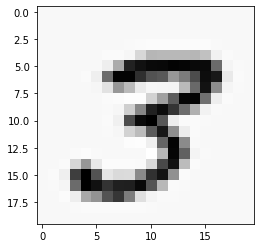

In [123]:
X = main_matrix
X = add_ones(X)

m = np.random.randint(0,5001)

Z = np.matmul(X[m],thetas1)

Z = Z.reshape((25,1))

Z = 1/(1+np.exp(-1*Z)) 

Z = np.vstack((1,Z))

Final = np.matmul(Z.T,thetas2)

Final = 1/(1+np.exp(-1*Final))


print("======================================")
print("Activation Results for the Last Layer")
for i in Final:
    z = 0
    for j in i: 
        print(z, ": ",round(float(j),3))
        z +=1
plt.imshow(main_matrix[m].reshape((20,20), order = "F") ,cmap = 'Greys', interpolation = 'None'); 

print("======================================")
print("Prediction", Final.argmax())

In [124]:
empty = []
for m in range(0,5000):


    Z = np.matmul(X[m],thetas1)

    Z = Z.reshape((25,1))

    Z = 1/(1+np.exp(-1*Z)) 

    Z = np.vstack((1,Z))

    Final = np.matmul(Z.T,thetas2)

    Final = 1/(1+np.exp(-1*Final))
    
    empty.append(Final)



In [125]:
Final1 = np.asarray(empty)

In [126]:
def find_accuracy(prediction_matrix,y):
    
    prediction_accuracy = []
    
    for i in range(len(y)): 
        if  prediction_matrix[i].argmax() == y[i]:
            prediction_accuracy.append(1)
        else:
            prediction_accuracy.append(0)
            
        
    return np.asarray(prediction_accuracy)

In [127]:
y = training['y']

In [128]:
prediction = find_accuracy(Final1, y)

In [129]:
prediction.mean()
print("Prediction Accuracy = {accuracy:.1f} % ".format(accuracy = prediction.mean()*100))

Prediction Accuracy = 99.9 % 
